# Proyecto 3 - Vacunación COVID-19 Costa Rica

G01 - Elementos de Computación

Prof. Rodrigo Bogarin Navarro

Ian Steven Coto Soto

2021121435

I Semestre

2022

Introducción:

En el año 2020 sucedió algo para lo que el mundo no estaba preparado, un virus ocasionó uno de los mayores temores mundiales que el ser humano moderno ha visto, con casi de 906 mil contagios y más de 6 mil muertes, ha cambiado drásticamente al mundo. La pandemia por COVID-19 provocó que países, capitales y contientes cerrasen sus fronteras, además, el individuo promedio quedó confinado a las 4 paredes de su hogar. 

Muchos conocieron el teletrabajo, mientras que otros lo perdieron definitivamente debido a que al mismo tiempo, ocurrió una crisis económica a nivel mundial tanto para compañías como para las personas promedio, lo que provocó pérdidas, incluso algunas llegando a cerrar. Como se mencionó antes, afectó al mundo entero en el sector económico, muchas monedas decendieron su valor viendo reflejadas estas consecuencias hasta nuestros días, como ejemplo 568,42 colones a principios de 2020 equivalían a 1 dólar, ahora casi alcanza los 700 colones. 

Aunque gracias a las vacunas para combatir al virus con las que contamos desde hace más de un año, el mundo ha podido volver un poco a la normalidad de años anteriores. Pero, ¿cómo va nuestro país en cuanto a la vacunación? Esta pregunta la podemos responder viendo la información que comparte la caja que separa a su información por grupos de regiones, hospitales, establecimientos de salud, grupos de edad, entre otros. Todo se presenta en este documento mediante gráficas.

1. ¿Cuántas vacunas han sido aplicadas en cada una de las últimas semanas? ¿Cuál es la distribución porcentual por dosis?

La cantidad de vacunas que han sido aplicadas durante la pandemia hasta el día 5 de marzo, se puede observar en los gráficos. La primera dosis es la que más se ha aplicado, con más de 4 millones de dosis aplicadas en el país (figura 1), cuenta con un total del 41% de las dosis aplicadas en total (figura 2), la segunda dosis también supera los 4 millones pero se encuentra por detrás de la primera con un 38.2% de las dosis. La tercera dosis supera los 2 millones con un 20.6%, por último, la cuarta dosis que casi no llega a apreciarse debido a que se encuentra muy por debajo del millón, con solo un 0.2% de todas las dosis aplicadas. 

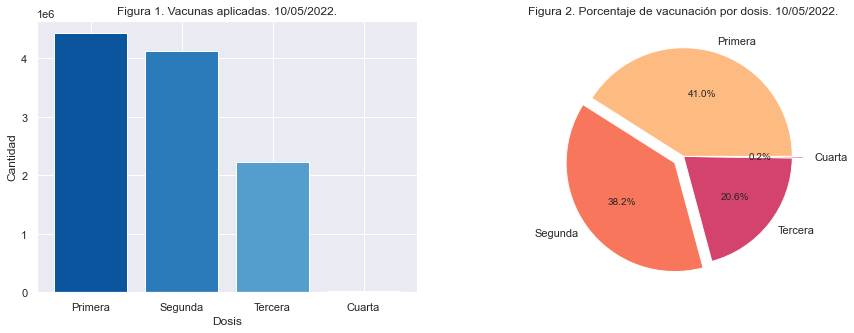

In [352]:
import pandas as pd # Se hace un import de los módulos para contar con todos ellos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv') # Abre el documento, se puede manipular como un DataFrame

datos_vacunacion = datos_vacunacion.groupby(['Region']).sum().sort_values('Region') # Los valores que se repitan en la columna
                                                                                    # "Region" se sumarán en el resto de 
                                                                                    # columnas (Dosis1, Dosis2...), así
                                                                                    # obteniendo un total por región en cada
                                                                                    # dosis y el total de todas las dosis en esa
                                                                                    # región, luego se ordenan en orden
                                                                                    # ascendiente según la columna "Region" 
                                                                                        

datos_vacunacion.loc['Totales Finales'] = [datos_vacunacion['Dosis1'].sum(), datos_vacunacion['Dosis2'].sum(), 
                                     datos_vacunacion['Dosis3'].sum(), datos_vacunacion['Dosis4'].sum(),
                                    datos_vacunacion['Total'].sum()] # Se crea una fila al final que suma el total de las dosis
                                                                     # aplicadas
    
datos_vacunacion.tail() # Adjunta la fila al DataFrame que se obtuvo del CSV

datos_vacunacion['Dosis'] = 'Cantidad' # Se crea una nueva columna
datos_vacunacion.rename(columns = {'Total':'Totales', 'Dosis1': 'Primera', 'Dosis2':'Segunda', 
                                   'Dosis3':'Tercera', 'Dosis4':'Cuarta'}, inplace = True) # Se cambia el nombre de las
                                                                                           # columnas del DataFrame
    
datos_vacunacion.reset_index(drop=True, inplace=True) # Se resetea el valor asociado a las filas
datos_vacunacion.drop(range(7), axis=0, inplace=True) # Se eliminan las primeras 7 columnas
datos_vacunacion.set_index('Dosis', inplace=True) # la cambia el valor que asocia a las filas por los que se contaba en la
                                                  # columna 'Dosis', quedando asociado cantidad a la fila que antes tendría
                                                  # la posición "0"

titulos_grupos_vacunados = 'Primera', 'Segunda', 'Tercera', 'Cuarta' # Crea para luego ser usados como títulos de los datos
                                                                     # de las gráficas

# Se llama a los valores correspondientes a su dato pero por su posición en el DataFrame
una_dosis = (datos_vacunacion.iloc[0,0]) 
dos_dosis = (datos_vacunacion.iloc[0,1])
tres_dosis = (datos_vacunacion.iloc[0,2])
cuatro_dosis = (datos_vacunacion.iloc[0,3])

# Se crea una lista con los datos anteriores para poder ser introducida fácilmente en las funciones del gráfico
grupos_vacunados = [una_dosis, dos_dosis, tres_dosis, cuatro_dosis]

# Valor que será usado para la gráfica circular siendo asociado a la distancia de separación de cada dato al centro (su rebanada)
resaltar = (0, 0.1, 0, 0.1)

# Colores seaborn
escala_magma = sns.color_palette("magma_r")
escala_azules = sns.color_palette("Blues_r")

# Funcion que permite acomodar series de gráficos juntos
fig, (cantidad_vacunas, porcentaje_vacunas) = plt.subplots(1,2, figsize=(15,5))
# dos valores después de fig que corresponden a cada eje, en este caso, se les da este nombre ya que solamente va
# un cierto gráfico por eje

#Gráfico de barras
cantidad_vacunas.bar(titulos_grupos_vacunados, grupos_vacunados, color=escala_azules) # los dos primeros pasan como listas,
                                                                                      # y por eso se ven 4 valores en vez de uno

# Asignar nombre al gráfico y ejes
cantidad_vacunas.set_title('Figura 1. Vacunas aplicadas. 10/05/2022.')
cantidad_vacunas.set_xlabel('Dosis')
cantidad_vacunas.set_ylabel('Cantidad')

#Gráfico circular
porcentaje_vacunas.pie(grupos_vacunados, explode=resaltar, labels=titulos_grupos_vacunados, colors= escala_magma, autopct='%1.1f%%',
        shadow=False) # autopct='%1.1f%%' para mostrarse como porcentaje

porcentaje_vacunas.set_title('Figura 2. Porcentaje de vacunación por dosis. 10/05/2022.')

plt.show() # Función que permite mostrar los gráficos


2. ¿Cuáles son las regiones de salud que presentan mayor vacunación total? ¿Por dosis?

Las 3 regiones de salud que presentan mayor vacunación total, siguen este mismo orden para la primera, segunda y tercera dosis. Se puede apreciar que la primera es Central Sur, con más de 1.6 millones en la primera dosis, casi 1.2 millones en la segunda, casi 1 millón en la tercera y pocas cuartas dosis (como se puede observar en la figura 3), dando un total de más de 4 millones de dosis (figura 4). La segunda en aparecer es Central Norte con casi 1.2 millones en la primer dosis, 1.1 millones aproximadamente en la segunda, más de 600 mil en la tercera y muy pocos en la cuarta, dando un total de más de 2.5 millones. Por último, como la tercera región, se encuentra Chorotega, con 400 mil primeras dosis, poco menos de 400 mil en la segunda, menos de 200 mil en la tercera y pocas en al cuarta, resultando en un total de casi 1 millón de dosis.

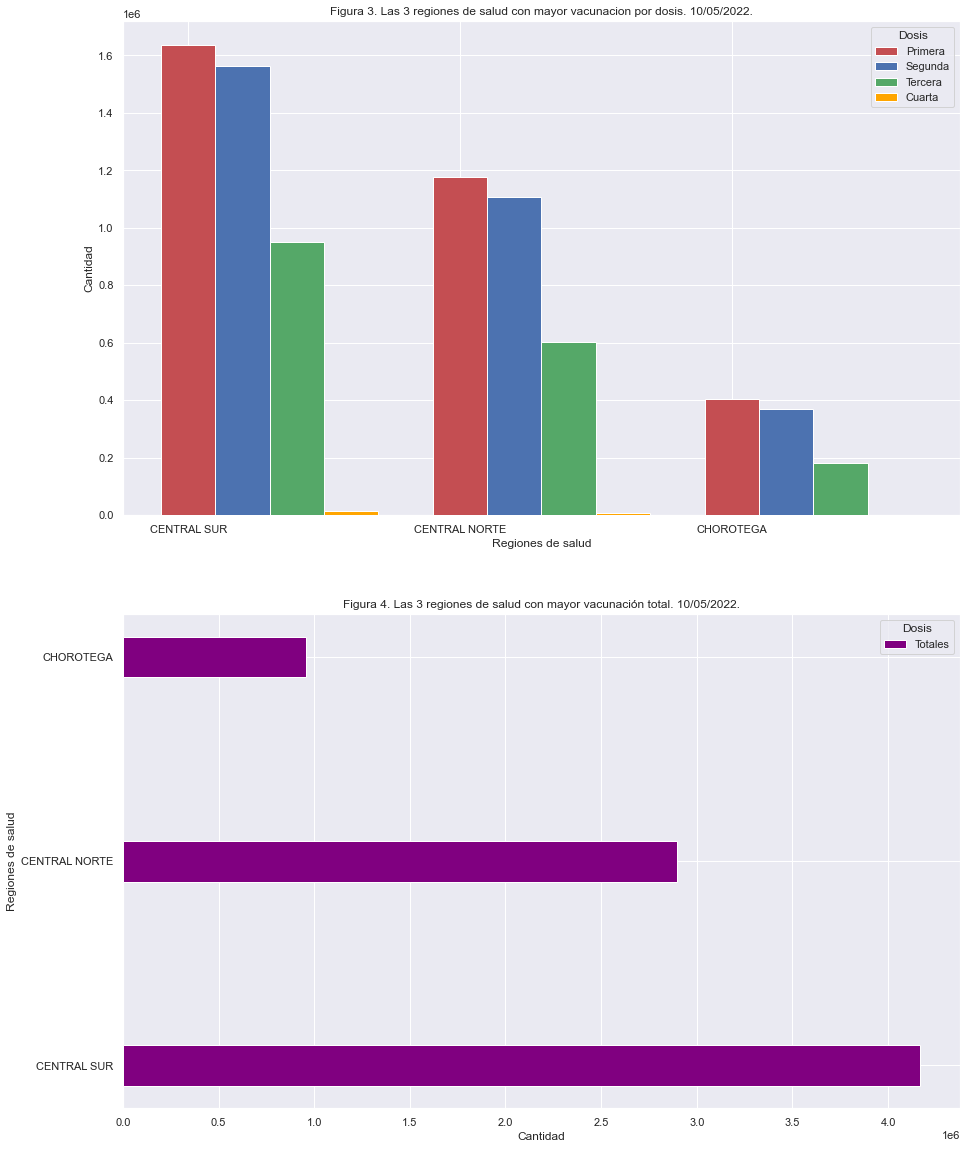

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.groupby(['Region']).sum() # Se suman todos los datos que coincidan según "Region" en las
                                                              # las otras columnas

datos_vacunacion.tail()

datos_vacunacion.sort_values('Dosis1', ascending=False, inplace=True) # Se ordenan los datos en orden descendiente según
                                                                      # la columna "Dosis1", esto para obtener los 5 mayores

datos_vacunacion['Region'] = datos_vacunacion.index # Se crea una columna con los valores que se encuentra en el index, los
                                                    # cuales corresponden a las regiones, para luego poder ser usada para
                                                    # títulos

datos_vacunacion = datos_vacunacion.head(3) # Se obtienen los 3 primeros datos que concuerdan en todo de mayor a menor, todas
                                            # dosis y el total

fig, axs = plt.subplots(2,1, figsize=(15,20)) # Dos figuras, dos filas y una columna, quedan una encima de otra

#Se obtienen estos datos de esta manera para tenerlos como listas y poder ser introducidos fácilmente en los gráficos
una_dosis = datos_vacunacion['Dosis1']
dos_dosis = datos_vacunacion['Dosis2']
tres_dosis = datos_vacunacion['Dosis3']
cuatro_dosis = datos_vacunacion['Dosis4']
total_dosis = datos_vacunacion['Total']
nombre_regiones = datos_vacunacion['Region']

# Será usado para definir distancias y el grueso de las barrras
grueso = 0.2

# Con esto se establecen valores que servirán para distanciar a la misma medida las barras 
barra_una_dosis = np.arange(len(nombre_regiones)) # Del mismo largo que el número de barras de diferente valor
barra_dos_dosis = [anterior+grueso for anterior in barra_una_dosis] # Se suma el anterior cada vez que es llamado, así
                                                                    # mantienen distancia siempre
barra_tres_dosis = [anterior+grueso for anterior in barra_dos_dosis]
barra_cuatro_dosis = [anterior+grueso for anterior in barra_tres_dosis]

top_zonas_graf = axs[0] # La primera figura del subplot, queda arriba

top_zonas_graf.grid(zorder=0, axis='y') # Para que tenga celdas

# Toma a las diferentes "barras_xxxx_dosis" como el valor de x, eso hace que se distancien, luego toma el valor de "xxxx_dosis"
# como y, como es una lista, se harán varias barras en el mismo gráfico. Se hacen varias que representan cada dosis por región

#Label="xxx" para diferenciarlo luego en legend()

# zorder mayor al del grid para estar por encima de las celdas del gráfico
top_zonas_graf.bar(nombre_regiones, una_dosis, grueso, label='Primera', color='r', zorder=3)
top_zonas_graf.bar(barra_dos_dosis, dos_dosis, grueso, label='Segunda', color='b', zorder=3)
top_zonas_graf.bar(barra_tres_dosis, tres_dosis, grueso, label='Tercera', color='g', zorder=3)
top_zonas_graf.bar(barra_cuatro_dosis, cuatro_dosis, grueso, label='Cuarta', color='orange', zorder=3)
top_zonas_graf.set_xlabel('Regiones de salud')
top_zonas_graf.set_ylabel('Cantidad')
top_zonas_graf.set_title('Figura 3. Las 3 regiones de salud con mayor vacunacion por dosis. 10/05/2022.')
top_zonas_graf.legend(title="Dosis") # Cuadro que muestra los títulos de las barras de acuerdo al color

top_zonas_total_graf = axs[1] # La segunda figura del subplot, queda abajo

top_zonas_total_graf.grid(zorder=0, axis='x')

# Barh hace que las barras sean horizontales
# Representa al total de las dosis
top_zonas_total_graf.barh(nombre_regiones, total_dosis, grueso, color='purple', zorder=3, label='Totales')
top_zonas_total_graf.set_xlabel('Cantidad')
top_zonas_total_graf.set_ylabel('Regiones de salud')
top_zonas_total_graf.set_title('Figura 4. Las 3 regiones de salud con mayor vacunación total. 10/05/2022.')
top_zonas_total_graf.legend(title='Dosis')

plt.show()


3. ¿Cuáles son las regiones de salud que presentan menor vacunación total? ¿Por dosis?

Ocurre algo similar en este caso pero al revés, el último en la vacunación coincide en que es el último en todas las dosis, el penúltimo y antepenúltimo igual. La región Brunca es la más alta de estos 3, con más de 300 mil primeras dosis, casi 300 mil segundas dosis, casi 150 mil terceras dosis y casi ninguna cuarta, con un total de más de 700 mil. La penúltima es Pacífico Central con más de 250 mil primeras dosis, unas 230 mil segundas dosis aproximadamente, más de 100 mil terceras dosis y casi ninguna cuarta, da un total de menos de 600 mil. La región con peor vacunación es Huetar Norte, casi 250 mil primeras dosis, poco más de 200 mil segundas dosis, 80 mil terceras dosis aproximadamente y ninguna cuarta, cuenta con un total de más de 500 mil dosis. 

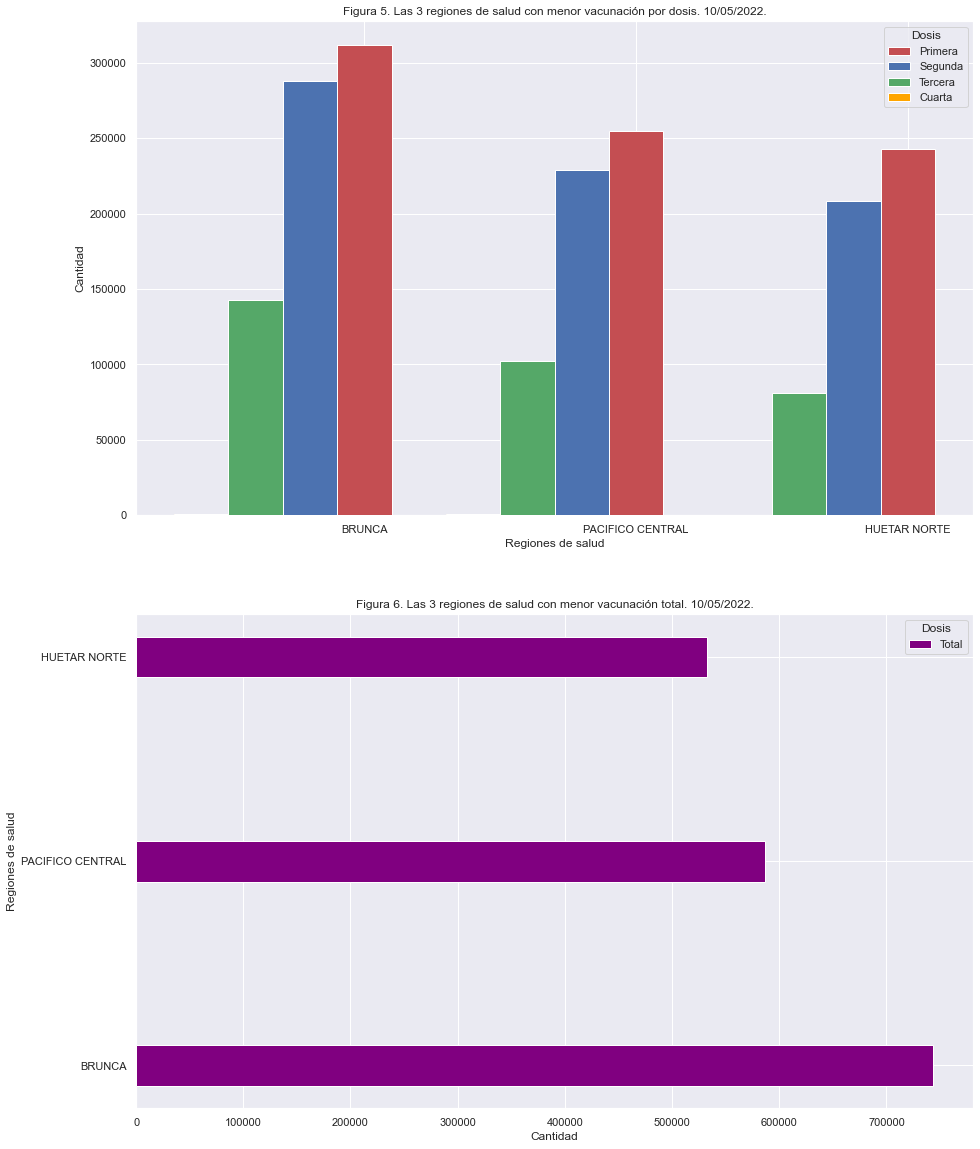

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

del (datos_vacunacion['Fecha'], datos_vacunacion['AreaSalud']) # Se eliminan columnas innecesarias

datos_vacunacion = datos_vacunacion.groupby(['Region']).sum() # Se agrupa por suma, al igual que antes
datos_vacunacion.tail()

datos_vacunacion.sort_values('Total', ascending=True, inplace=True) # Se reordenan en orden ascendiente, teniendo los menores
                                                                    # de primero
datos_vacunacion = datos_vacunacion.head(3) # Se toman solo los 3 primeros, que ente caso son los menores según el total

# Se crea un subplot para dos figuras
fig, axs = plt.subplots(2,1, figsize=(15,20))

# listas
una_dosis = datos_vacunacion['Dosis1']
dos_dosis = datos_vacunacion['Dosis2']
tres_dosis = datos_vacunacion['Dosis3']
cuatro_dosis = datos_vacunacion['Dosis4']
total_dosis = datos_vacunacion['Total']
nombre_regiones = datos_vacunacion.index # Se toman los valores directamente del index, correspondiente a la región

grueso = 0.2

# Espaciado entre barras
barra_una_dosis = np.arange(len(nombre_regiones))
barra_dos_dosis = [anterior+grueso for anterior in barra_una_dosis]
barra_tres_dosis = [anterior+grueso for anterior in barra_dos_dosis]
barra_cuatro_dosis = [anterior+grueso for anterior in barra_tres_dosis]

top_zonas_graf = axs[0] # Primera figura

top_zonas_graf.grid(zorder=0, axis='y')
top_zonas_graf.bar(nombre_regiones, una_dosis, grueso, label='Primera', color='r', zorder=3)
top_zonas_graf.bar(barra_dos_dosis, dos_dosis, grueso, label='Segunda', color='b', zorder=3)
top_zonas_graf.bar(barra_tres_dosis, tres_dosis, grueso, label='Tercera', color='g', zorder=3)
top_zonas_graf.bar(barra_cuatro_dosis, cuatro_dosis, grueso, label='Cuarta', color='orange', zorder=3)
top_zonas_graf.set_xlabel('Regiones de salud')
top_zonas_graf.set_ylabel('Cantidad')
top_zonas_graf.set_title('Figura 5. Las 3 regiones de salud con menor vacunación por dosis. 10/05/2022.')
top_zonas_graf.legend(title='Dosis')
top_zonas_graf.invert_xaxis()

top_zonas_total_graf = axs[1] # Segunda figura

top_zonas_total_graf.grid(zorder=0, axis='x')
top_zonas_total_graf.barh(nombre_regiones, total_dosis, grueso, color='purple', label='Total', zorder=3)
top_zonas_total_graf.set_xlabel("Cantidad")
top_zonas_total_graf.set_ylabel('Regiones de salud')
top_zonas_total_graf.set_title('Figura 6. Las 3 regiones de salud con menor vacunación total. 10/05/2022.')
top_zonas_total_graf.legend(title='Dosis')
top_zonas_total_graf.invert_yaxis()

plt.show()


4. ¿Cuáles son los 10 establecimientos de salud que presentan mayor vacunación total? ¿Por dosis?. Debe excluir hospitales y otros.

Los 10 establecimientos de salud varian mucho en cuanto a las posiciones según la dosis y el total. En la figura 7, de la primera dosis, se observa a Perez Zeledón como primero con más de 120 mil dosis, y como décimo a Pavas con más de 60 mil. En la segunda dosis (figura 8), Perez Zeledón vuelve a ser primero con casi 120 mil dosis, mientras que el décimo es Alajuela Oeste con más de 60 mil. En la figura 9, se observa a Cartago como primero con más de 70 mil terceras dosis y a Guapiles de décimo con unas 36 mil aproximadamente. En cuanto a la cuarta dosis, en la figura 10, Turrialba-Jimenez es el primero con casi 1400 dosis y Pavas es el décimo con 600 dosis. En el total, gana Perez Zeledón con más de 300 mil, como décimo se encuentra Alajuela Norte con más de 150 mil.

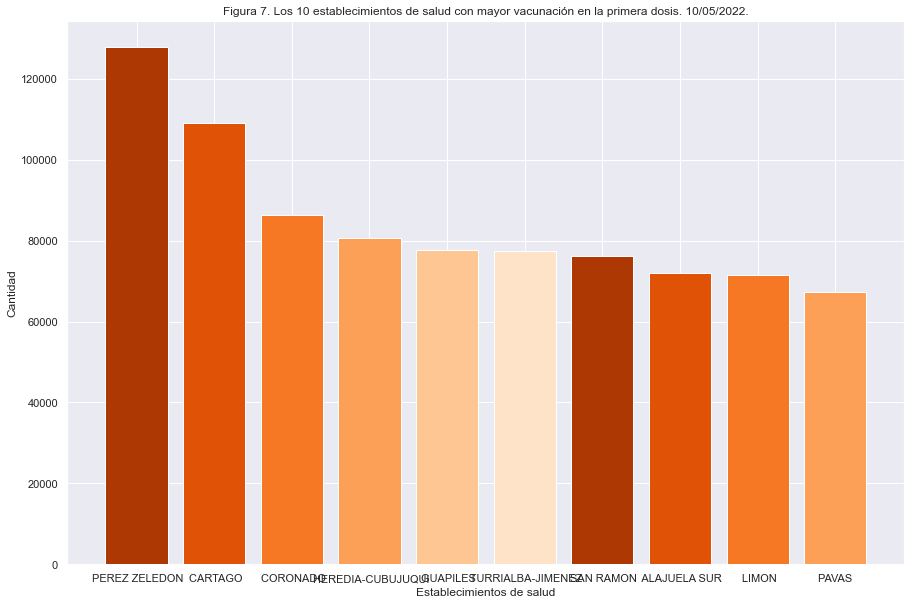

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

# Se excluye a cualquier dato de la columna AreaSalud que contenga los caracteres "HOSPITAL", dejando solo establecimientos de
# salud, ~ es similar a un no
datos_vacunacion = datos_vacunacion.loc[~datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis1', ascending=False, inplace=True) # Orden descendiente según la columna Dosis1 

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index']) # Se eliminan columnas innecesarias

datos_vacunacion = datos_vacunacion.head(10) # Toma los 10 primeros datos que corresponden a los que presentan mayor vacunación
                                             # vacunacion en la primera dosis (lo mismo se hace en las siguientes dosis)

# listas
top_una_dosis = datos_vacunacion['Dosis1']

# se hace un for que lea los valores de esa columna y elimine esa serie de frases/palabras para que se vea mejor el gráfico
nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '') # Frase a eliminar
    area = area.replace('(COOPESALUD)', '') # Palabra a eliminar
    nombres_areas_salud.append(area) # Se agrega a la lista que se creó fuera del for 

# Crea una figura
graf = plt.figure(figsize=(15,10))    

escala_magma = sns.color_palette("Oranges_r")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_una_dosis, color=escala_magma, zorder= 3)

# Tamaño de los ejes y título, además de asignar nombre a ejes y título
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=7)
plt.xlabel('Establecimientos de salud')
plt.ylabel('Cantidad')
plt.title('Figura 7. Los 10 establecimientos de salud con mayor vacunación en la primera dosis. 10/05/2022.')

plt.show()


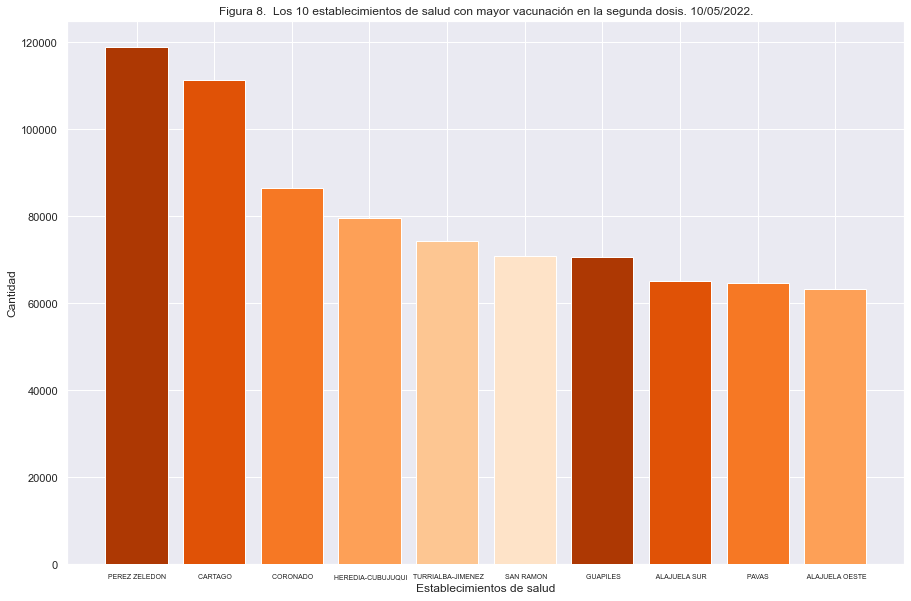

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('AREA DE SALUD', regex=True)]

datos_vacunacion.sort_values('Dosis2', ascending=False, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(10)

top_dos_dosis = datos_vacunacion['Dosis2']
nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('(COOPESALUD)', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(15,10))    
    
escala_inferno = sns.color_palette("Oranges_r")   
    
plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_dos_dosis, color=escala_inferno, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=7)
plt.xlabel('Establecimientos de salud')
plt.ylabel('Cantidad')
plt.title('Figura 8.  Los 10 establecimientos de salud con mayor vacunación en la segunda dosis. 10/05/2022.')

plt.show()


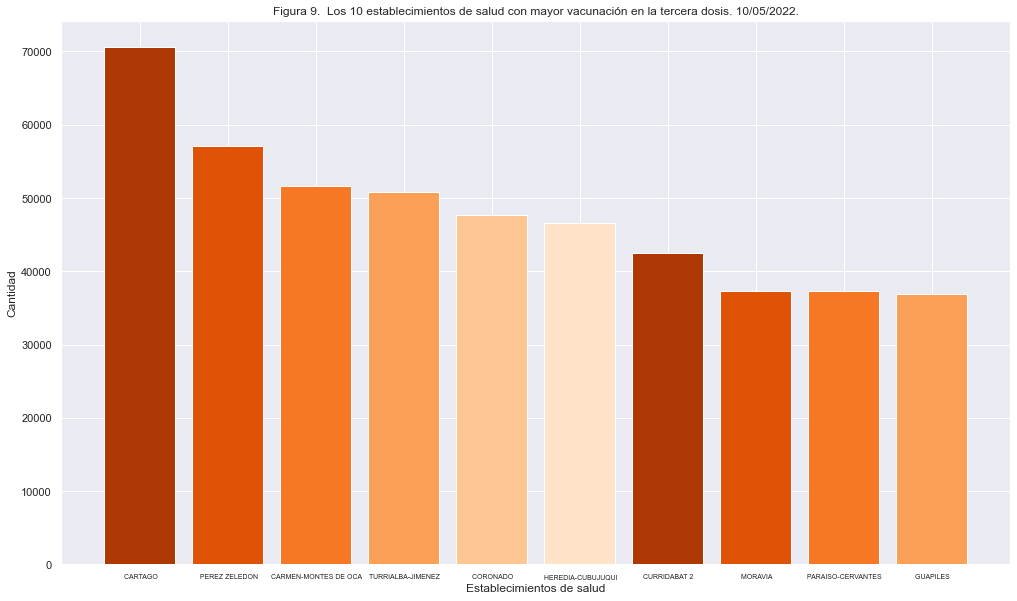

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[~datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis3', ascending=False, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(10)

top_tres_dosis = datos_vacunacion['Dosis3']
nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(17,10))    
    
escala_naranja = sns.color_palette("Oranges_r")   
    
plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_tres_dosis, color=escala_naranja, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=7)
plt.xlabel('Establecimientos de salud')
plt.ylabel('Cantidad')
plt.title('Figura 9.  Los 10 establecimientos de salud con mayor vacunación en la tercera dosis. 10/05/2022.')

plt.show()

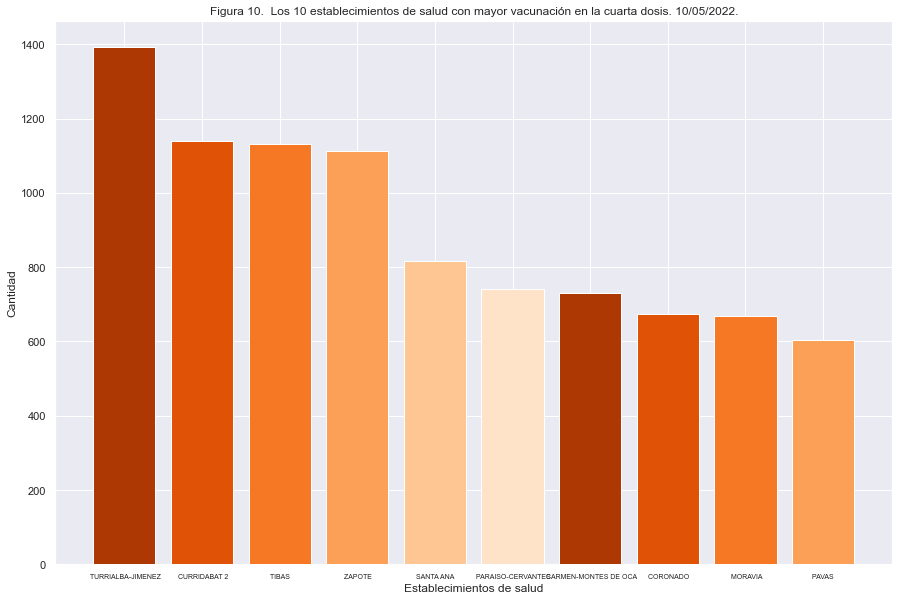

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[~datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis4', ascending=False, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(10)

top_cuatro_dosis = datos_vacunacion['Dosis4']
nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('(COOPESAIN) INTEGRADA RODRIGO FOURNIER', '')
    area = area.replace('(COOPESALUD)', '')
    area = area.replace('-CATEDRAL DR. CARLOS DURAN', '')
    area = area.replace('(COOPESANA)', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(15,10))    
    
escala_naranja_roja = sns.color_palette("Oranges_r")   
    
plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_cuatro_dosis, color=escala_naranja_roja, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=6)
plt.xlabel('Establecimientos de salud')
plt.ylabel('Cantidad')
plt.title('Figura 10.  Los 10 establecimientos de salud con mayor vacunación en la cuarta dosis. 10/05/2022.')

plt.show()

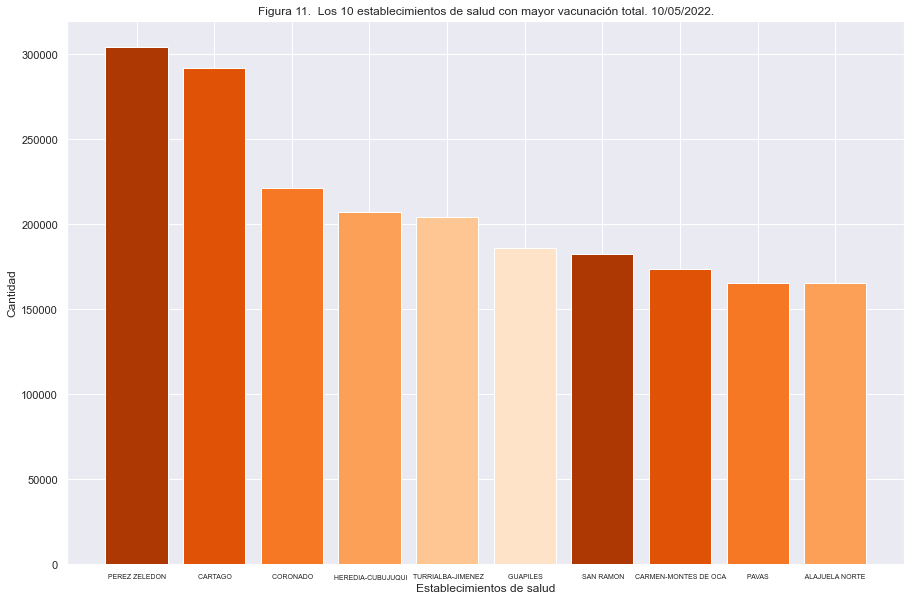

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[~datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Total', ascending=False, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(10)

top_total_dosis = datos_vacunacion['Total']
nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('(COOPESALUD)', '')
    area = area.replace('DR. MARCIAL RODRIGUEZ', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(15,10))    
    
escala_rosa = sns.color_palette("Oranges_r")   
    
plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_total_dosis, color=escala_rosa, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=7)
plt.xlabel('Establecimientos de salud')
plt.ylabel('Cantidad')
plt.title('Figura 11.  Los 10 establecimientos de salud con mayor vacunación total. 10/05/2022.')

plt.show()

5. ¿Cuáles son los 10 establecimientos de salud que presentan menor vacunación total?, por dosis?. Debe excluir hospitales y otros.

El CNH Humberto Araya Rojas siempre se encuentra de último en las tablas de vacunación, al igual que ocurre con Oficinas Centrales que siempre se encuentra de segundo. En cuanto al resto de posiciones, se pueden observar en las figuras 12 hasta la 16 según la dosis o el total, se encuentra lo que se necesite. CNH Humberto Araya Rojas no ha tenido vacunados por cuarta dosis y su total es de 2500 mil dosis aplicadas aproximadamente, mientras que Oficinas Centrales cuenta con menos de 10 mil dosis en total, pero al igual que la anterior, no cuenta con vacunados por cuarta dosis.

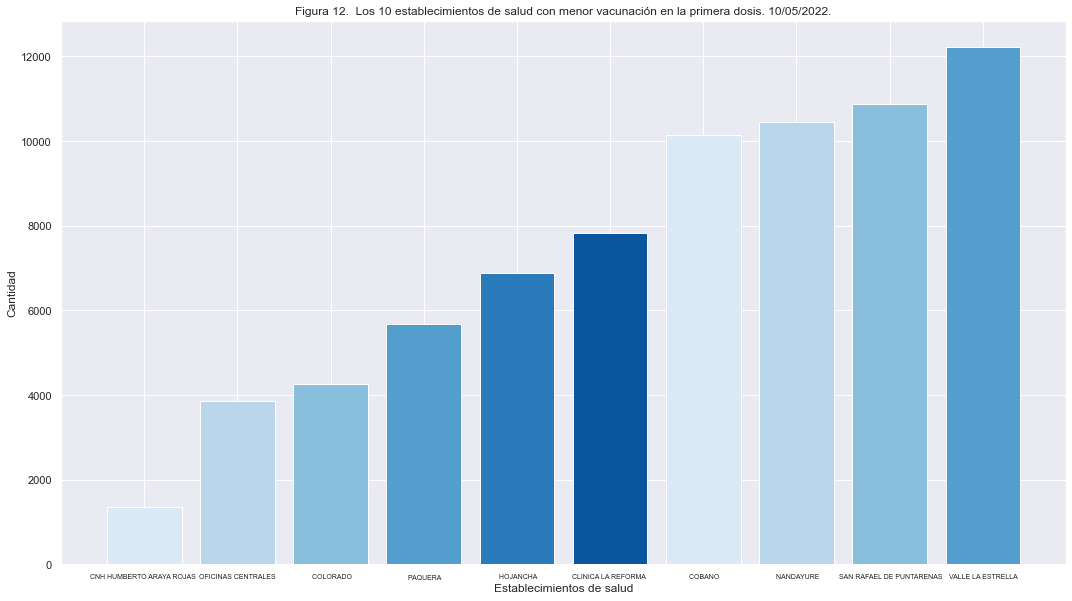

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[~datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis1', ascending=True, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(10)

bot_una_dosis = datos_vacunacion['Dosis1']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('(establecimiento de salud para poblacion cautiva)', '')
    area = area.replace('CENTRO NACIONAL DE REHABILITACION', 'CNH')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(18,10))    

escala_otono = sns.color_palette("Blues")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, bot_una_dosis, color=escala_otono, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=7)
plt.xlabel('Establecimientos de salud')
plt.ylabel('Cantidad')
plt.title('Figura 12.  Los 10 establecimientos de salud con menor vacunación en la primera dosis. 10/05/2022.')

plt.show()

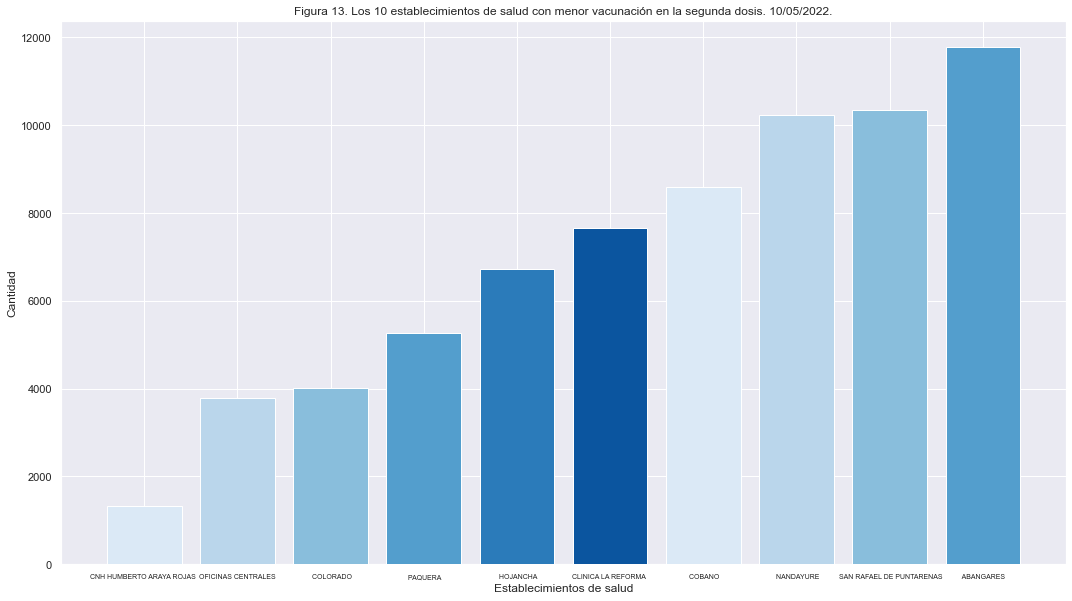

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[~datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis2', ascending=True, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(10)

bot_dos_dosis = datos_vacunacion['Dosis2']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('(establecimiento de salud para poblacion cautiva)', '')
    area = area.replace('CENTRO NACIONAL DE REHABILITACION', 'CNH')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(18,10))    

escala_hielo = sns.color_palette("Blues")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, bot_dos_dosis, color=escala_hielo, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=7)
plt.xlabel('Establecimientos de salud')
plt.ylabel('Cantidad')
plt.title('Figura 13. Los 10 establecimientos de salud con menor vacunación en la segunda dosis. 10/05/2022.')

plt.show()

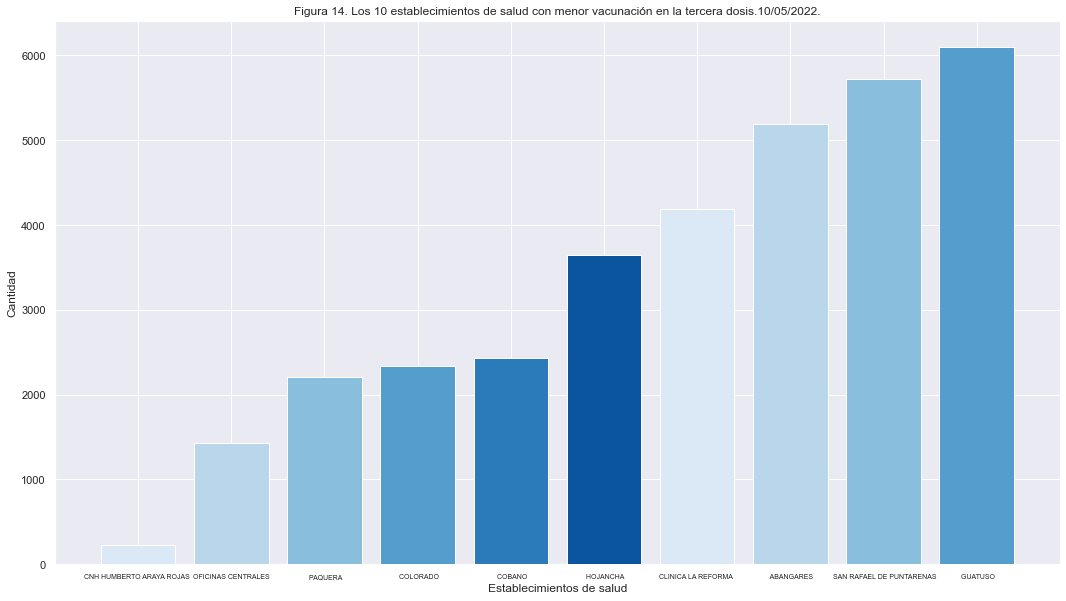

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[~datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis3', ascending=True, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(10)

bot_tres_dosis = datos_vacunacion['Dosis3']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('(establecimiento de salud para poblacion cautiva)', '')
    area = area.replace('CENTRO NACIONAL DE REHABILITACION', 'CNH')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(18,10))    

escala_hielo_r = sns.color_palette("Blues")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, bot_tres_dosis, color=escala_hielo_r, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=7)
plt.xlabel('Establecimientos de salud')
plt.ylabel('Cantidad')
plt.title('Figura 14. Los 10 establecimientos de salud con menor vacunación en la tercera dosis.10/05/2022.')

plt.show()

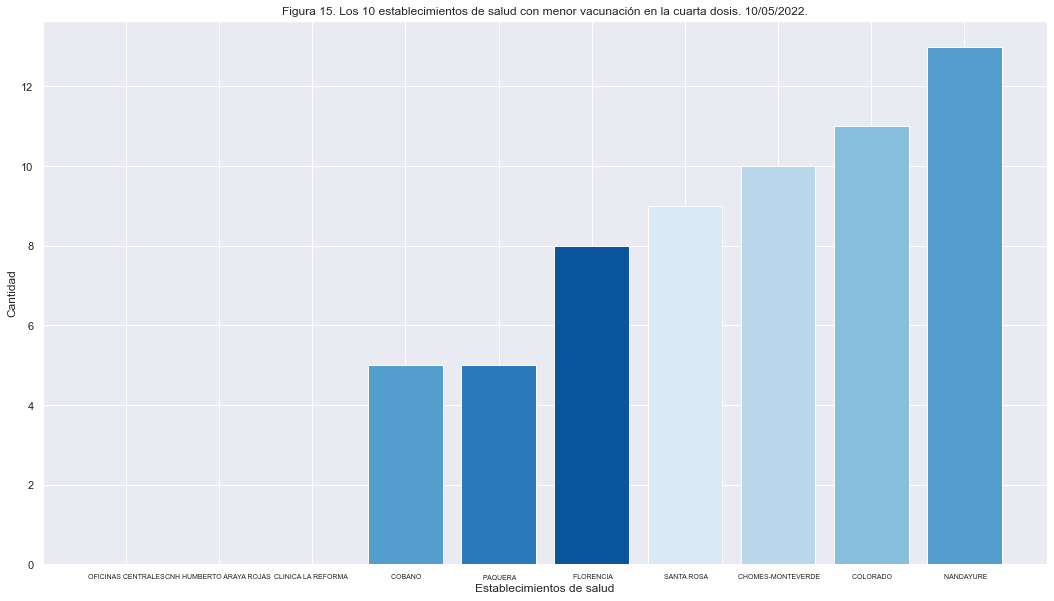

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[~datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis4', ascending=True, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(10)

bot_cuatro_dosis = datos_vacunacion['Dosis4']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('(establecimiento de salud para poblacion cautiva)', '')
    area = area.replace('CENTRO NACIONAL DE REHABILITACION', 'CNH')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(18,10))    

escala_azul = sns.color_palette("Blues")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, bot_cuatro_dosis, color=escala_azul, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=6)
plt.xlabel('Establecimientos de salud')
plt.ylabel('Cantidad')
plt.title('Figura 15. Los 10 establecimientos de salud con menor vacunación en la cuarta dosis. 10/05/2022.')

plt.show()

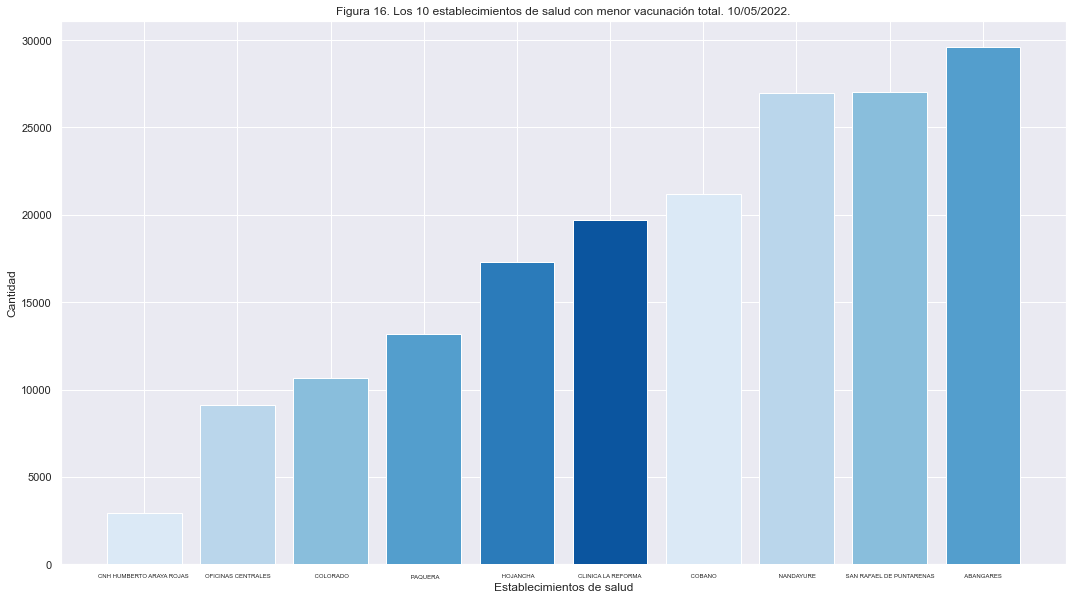

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[~datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Total', ascending=True, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(10)

bot_total_dosis = datos_vacunacion['Total']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('(establecimiento de salud para poblacion cautiva)', '')
    area = area.replace('CENTRO NACIONAL DE REHABILITACION', 'CNH')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(18,10))    

escala_oscuridad = sns.color_palette("Blues")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, bot_total_dosis, color=escala_oscuridad, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=7)
plt.xlabel('Establecimientos de salud')
plt.ylabel('Cantidad')
plt.title('Figura 16. Los 10 establecimientos de salud con menor vacunación total. 10/05/2022.')

plt.show()

6. ¿Cuáles son los 5 hospitales de mayor vacunación total? ¿Por dosis?.

El hospital Mexico lidera en la vacunación total y por dosis, a excepción de la cuarta dosis, que la lidera el hospital Dr. Moreno Cañas. La vacunación total en el hospital Mexico es de 100 mil dosis aplicadas, seguido del hospital Dr. Moreno Cañas
con casi 90 mil, como tercero el Rafael Ángel Calderón Guardia con más de 80 mil, luego el San Juan de Dios con 80 mil y como quinto se encuentra el Maximiliano Peralta Jimenez. Todo esto reflejado desde la figura 17 a la 21.

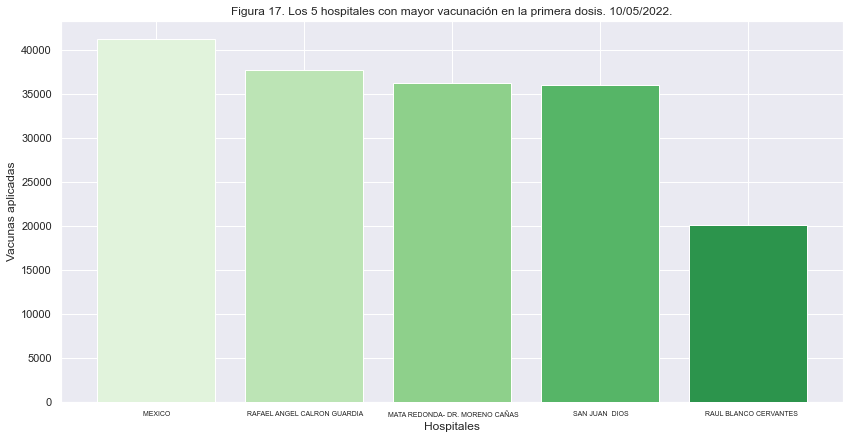

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

# Se incluyen a todos los datos que tengan escrito "HOSPITAL" según la columna de AreaSalud
datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis1', ascending=False, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(5)

top_una_dosis = datos_vacunacion['Dosis1']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']: # limpiar nombres
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('GERIATRIA Y GERONTOLOGIA', '')
    area = area.replace('NACIONAL', '')
    area = area.replace('HOSPITAL', '')
    area = area.replace('DE', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(14,7))    

escala_oscuridad = sns.color_palette("Greens")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_una_dosis, color=escala_oscuridad, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=8)
plt.xlabel('Hospitales')
plt.ylabel('Vacunas aplicadas')
plt.title('Figura 17. Los 5 hospitales con mayor vacunación en la primera dosis. 10/05/2022.')

plt.show()

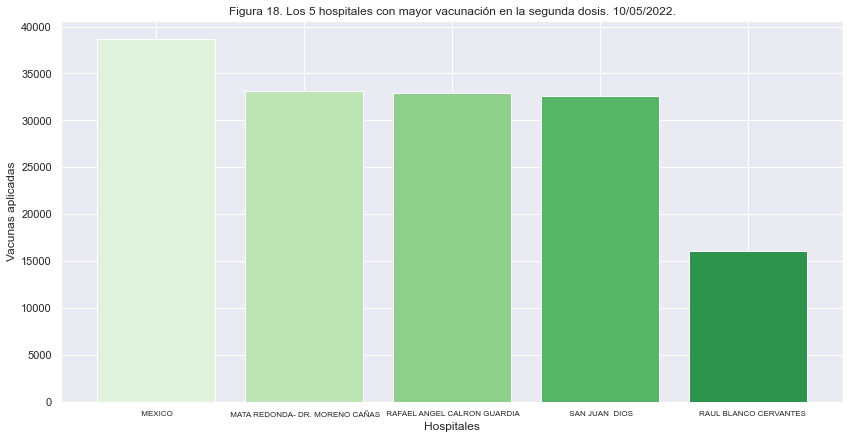

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis2', ascending=False, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(5)

top_dos_dosis = datos_vacunacion['Dosis2']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('GERIATRIA Y GERONTOLOGIA', '')
    area = area.replace('NACIONAL', '')
    area = area.replace('HOSPITAL', '')
    area = area.replace('DE', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(14,7))    

escala = sns.color_palette("Greens")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_dos_dosis, color=escala, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=8)
plt.xlabel('Hospitales')
plt.ylabel('Vacunas aplicadas')
plt.title('Figura 18. Los 5 hospitales con mayor vacunación en la segunda dosis. 10/05/2022.')

plt.show()

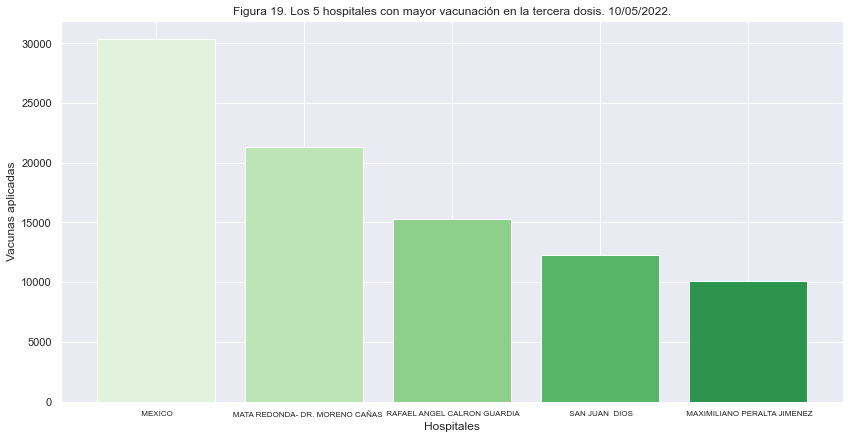

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis3', ascending=False, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(5)

top_tres_dosis = datos_vacunacion['Dosis3']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA', '')
    area = area.replace('SALUD', '')
    area = area.replace('HOSPITAL', '')
    area = area.replace('DE', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(14,7))    

escala = sns.color_palette("Greens")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_tres_dosis, color=escala, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=8)
plt.xlabel('Hospitales')
plt.ylabel('Vacunas aplicadas')
plt.title('Figura 19. Los 5 hospitales con mayor vacunación en la tercera dosis. 10/05/2022.')

plt.show()

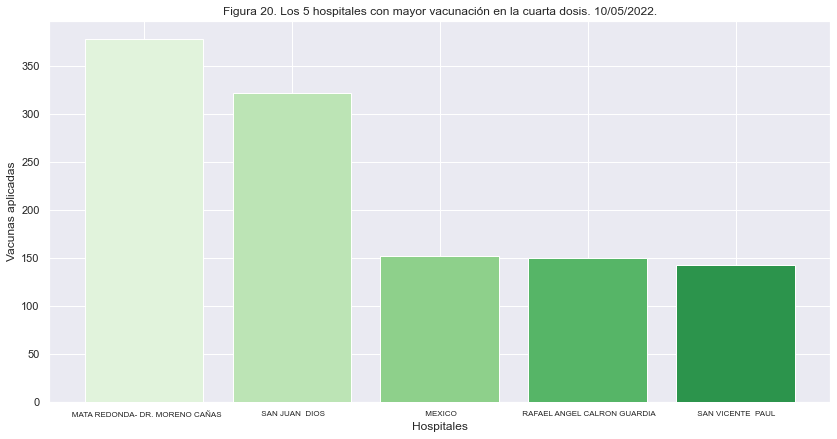

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis4', ascending=False, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(5)

top_cuatro_dosis = datos_vacunacion['Dosis4']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('AREA', '')
    area = area.replace('SALUD', '')
    area = area.replace('HOSPITAL', '')
    area = area.replace('DE', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(14,7))    

escala = sns.color_palette("Greens")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_cuatro_dosis, color=escala, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=8)
plt.xlabel('Hospitales')
plt.ylabel('Vacunas aplicadas')
plt.title('Figura 20. Los 5 hospitales con mayor vacunación en la cuarta dosis. 10/05/2022.')

plt.show() 

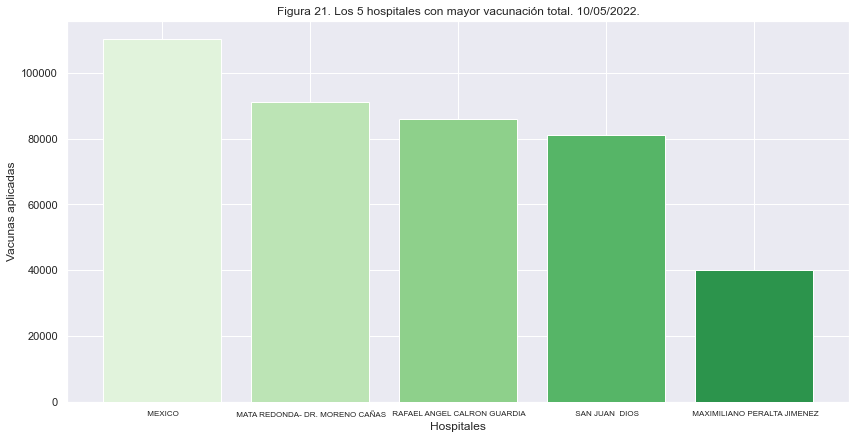

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Total', ascending=False, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(5)

top_total_dosis = datos_vacunacion['Total']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('HOSPITAL', '')
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('DE', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(14,7))    

escala = sns.color_palette("Greens")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_total_dosis, color=escala, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=8)
plt.xlabel('Hospitales')
plt.ylabel('Vacunas aplicadas')
plt.title('Figura 21. Los 5 hospitales con mayor vacunación total. 10/05/2022.')

plt.show() 

7. ¿Cuáles son los 5 hospitales de menor vacunación total? ¿Por dosis?

Desde la figura 22 hasta la 26 se observan los menores índices de vacunación por hospitales, como último indiscutible en todas las dosis y el total se encuentra el Psiquiátrco Roberto Chacón Paut, con un total de 100 dosis en total. Otros hospitales recurentes en estas útlimas posiciones son el Manuel Mora Valverde, Osa Tomas Casas, San Vito, Ciudad Neilly, entre otros. Un dato curioso que se observa en la figura 25 es que los 5 centros con menor vacunación total, no cuentan con ninguna dosis aplicada de estas.

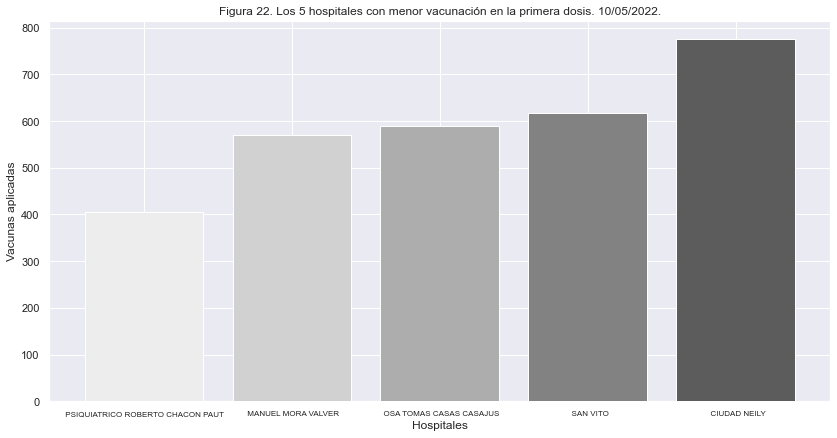

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis1', ascending=True, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(5)

top_una_dosis = datos_vacunacion['Dosis1']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('HOSPITAL', '')
    area = area.replace('DE', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(14,7))    

escala = sns.color_palette("Greys")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_una_dosis, color=escala, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=8)
plt.xlabel('Hospitales')
plt.ylabel('Vacunas aplicadas')
plt.title('Figura 22. Los 5 hospitales con menor vacunación en la primera dosis. 10/05/2022.')

plt.show()

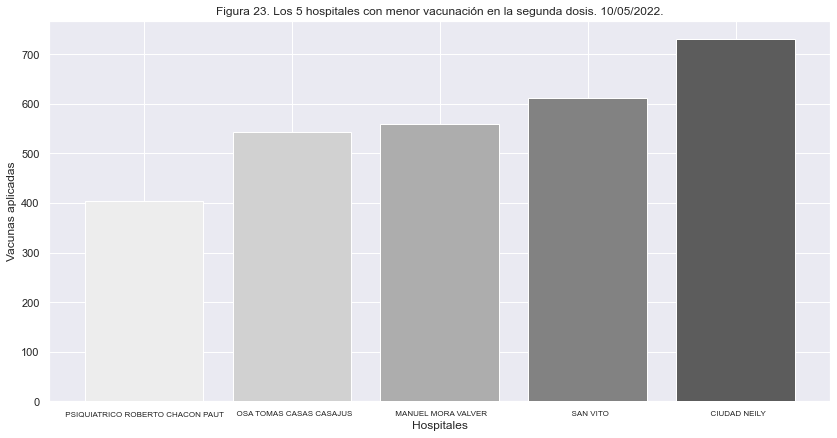

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis2', ascending=True, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(5)

top_dos_dosis = datos_vacunacion['Dosis2']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('HOSPITAL', '')
    area = area.replace('DE', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(14,7))    

escala = sns.color_palette("Greys")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_dos_dosis, color=escala, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=8)
plt.xlabel('Hospitales')
plt.ylabel('Vacunas aplicadas')
plt.title('Figura 23. Los 5 hospitales con menor vacunación en la segunda dosis. 10/05/2022.')

plt.show()

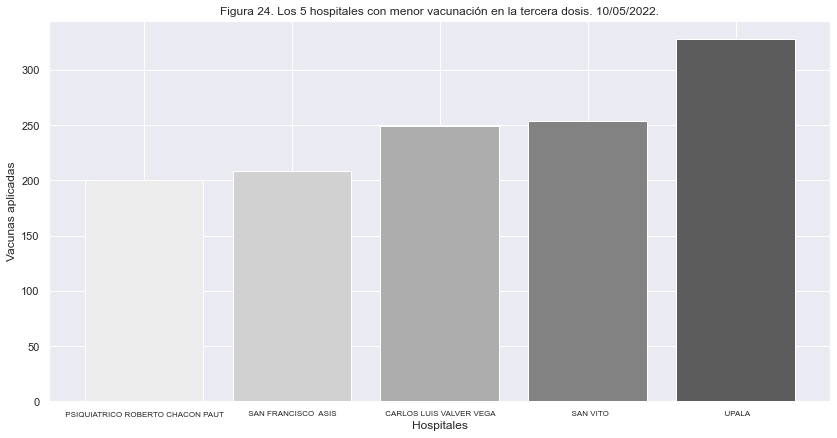

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis3', ascending=True, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(5)

top_tres_dosis = datos_vacunacion['Dosis3']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('HOSPITAL', '')
    area = area.replace('DE', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(14,7))    

escala = sns.color_palette("Greys")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_tres_dosis, color=escala, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=8)
plt.xlabel('Hospitales')
plt.ylabel('Vacunas aplicadas')
plt.title('Figura 24. Los 5 hospitales con menor vacunación en la tercera dosis. 10/05/2022.')

plt.show()

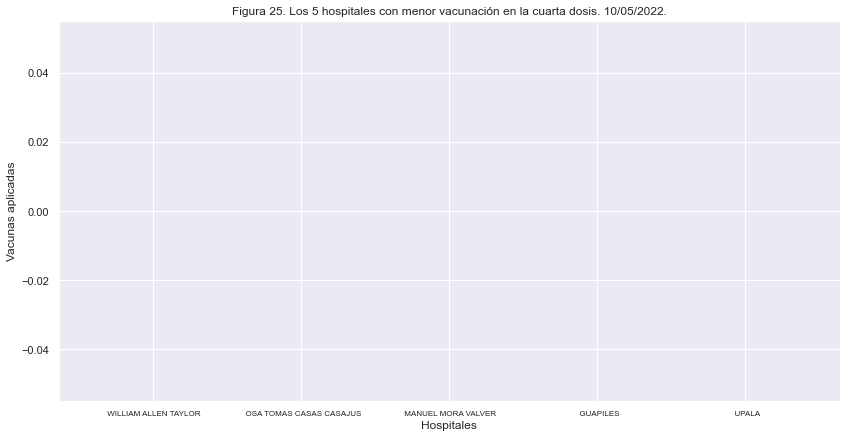

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Dosis4', ascending=True, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(5)

top_cuatro_dosis = datos_vacunacion['Dosis4']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('HOSPITAL', '')
    area = area.replace('DE', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(14,7))    

escala = sns.color_palette("Greys")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_cuatro_dosis, color=escala, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=8)
plt.xlabel('Hospitales')
plt.ylabel('Vacunas aplicadas')
plt.title('Figura 25. Los 5 hospitales con menor vacunación en la cuarta dosis. 10/05/2022.')

plt.show() 

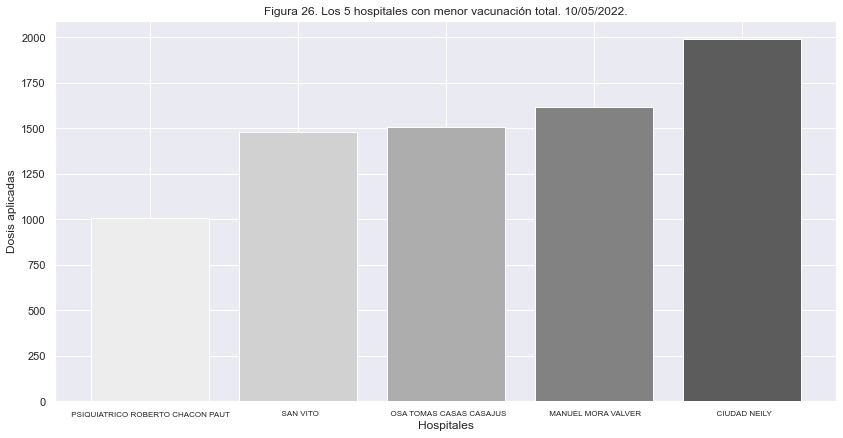

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datos_vacunacion = pd.read_csv('Vacunacion220510.csv')

datos_vacunacion = datos_vacunacion.loc[datos_vacunacion['AreaSalud'].str.contains('HOSPITAL', regex=True)]

datos_vacunacion.sort_values('Total', ascending=True, inplace=True)

datos_vacunacion.reset_index(inplace=True)

del (datos_vacunacion['Fecha'], datos_vacunacion['Region'], datos_vacunacion['index'])

datos_vacunacion = datos_vacunacion.head(5)

top_total_dosis = datos_vacunacion['Total']

nombres_areas_salud = []
for area in datos_vacunacion['AreaSalud']:
    area = area.replace('HOSPITAL', '')
    area = area.replace('AREA DE SALUD', '')
    area = area.replace('DE', '')
    nombres_areas_salud.append(area)

graf = plt.figure(figsize=(14,7))    

escala = sns.color_palette("Greys")

plt.grid(zorder=0, axis='y')
plt.bar(nombres_areas_salud, top_total_dosis, color=escala, zorder= 3)

plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=8)
plt.xlabel('Hospitales')
plt.ylabel('Dosis aplicadas')
plt.title('Figura 26. Los 5 hospitales con menor vacunación total. 10/05/2022.')

plt.show() 

8. ¿Cual es la distribución de dosis aplicadas para los grupos de menos de 20 años, de menos de 40 años y de más de 40 años?¿Por dosis?

Desde la figura 27 hasta la 31 se observan los 3 grupos y cuantas dosis han sido aplicadas en ellos. En la última se observa que ninguna dosis había sido aplicada a ningún menor de 40 años. Además se observa como siempre los primeros son el grupo mayor, seguido del intermedio y por último, los más jóvenes. Más de 5 millones han sido aplicadas a mayores de 40, casi 4 millones a personas de entre 20 y 40, y poco menos de 2 millones a menores de 20 años.

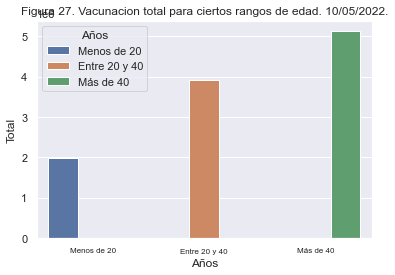

In [376]:
import pandas as pd
import seaborn as sns
grupos_dosis = pd.DataFrame({'Edad': ['5 a 11', '12 a 19', '20 a 39', '40 a 57', '+57'], 
                                'Primera':[376192, 569069, 1630430, 1069960, 791978], 
                                'Segunda':[298096, 516689, 1507239, 1030148, 790845],
                               'Tercera':[0, 219791, 766106, 668003, 645281], 
                               'Cuarta':[0, 21, 197, 4387, 133192]}) # Se crea un data frame que asocia columnas a valores
                                                                     # mediante la creación de un diccionario

# Nueva columna que es la suma de las otras dosis
grupos_dosis['Total'] = (grupos_dosis['Primera'] + grupos_dosis['Segunda'] + grupos_dosis['Tercera'] + grupos_dosis['Cuarta'])

# Si se encuentra ese valor es esa columna, se cambio o rescribe por el de la derecha del igual =
grupos_dosis.loc[grupos_dosis['Edad'] == '12 a 19', ['Edad']] = ['Menos de 20'] 
grupos_dosis.loc[grupos_dosis['Edad'] == '+57', ['Edad']] = ['Más de 40'] 
grupos_dosis.loc[grupos_dosis['Edad'] == '20 a 39', ['Edad']] = ['Entre 20 y 40'] 

# Se pone la columna "Edad" como el index
grupos_dosis = grupos_dosis.set_index('Edad')

# Se suman filas para obtener los grupos de edad
grupos_dosis.loc['Más de 40'] += grupos_dosis.loc['40 a 57']
grupos_dosis.loc['Menos de 20'] += grupos_dosis.loc['5 a 11']

# Se eliminan las filas que ya no se necesitan
grupos_dosis.drop(['5 a 11', '40 a 57'], inplace=True)

# Nueva columna apartir de los valores de index
grupos_dosis['Años'] = grupos_dosis.index.values

# Se crea una gráfica de barras con seaborn
sns.barplot(x='Años', y='Total', hue='Años', data=grupos_dosis).set(title='Figura 27. Vacunacion total para ciertos rangos de edad. 10/05/2022.')
sns.set(rc={'figure.figsize':(10.0,7.0)}) # Tamaño del gráfico
# Años se pasa como x para asociar sus valores abajo y que se muestren en ese eje (x)
# hue sirve como legend de plt

plt.show()


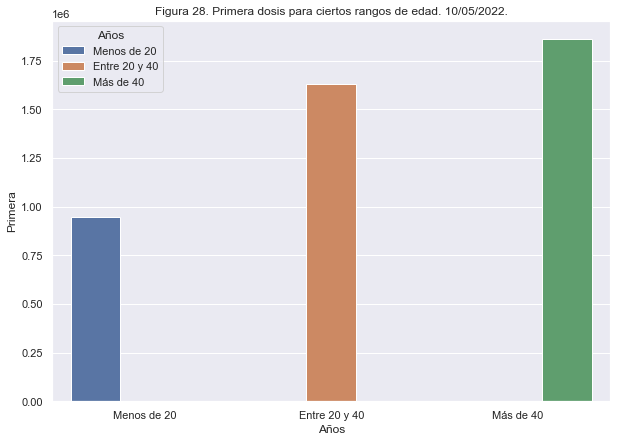

In [377]:
import pandas as pd
import seaborn as sns
grupos_dosis = pd.DataFrame({'Edad': ['5 a 11', '12 a 19', '20 a 39', '40 a 57', '+57'], 
                                'Primera':[376192, 569069, 1630430, 1069960, 791978], 
                                'Segunda':[298096, 516689, 1507239, 1030148, 790845],
                               'Tercera':[0, 219791, 766106, 668003, 645281], 
                               'Cuarta':[0, 21, 197, 4387, 133192]})

grupos_dosis['Total'] = (grupos_dosis['Primera'] + grupos_dosis['Segunda'] + grupos_dosis['Tercera'] + grupos_dosis['Cuarta'])

grupos_dosis.loc[grupos_dosis['Edad'] == '12 a 19', ['Edad']] = ['Menos de 20'] 
grupos_dosis.loc[grupos_dosis['Edad'] == '+57', ['Edad']] = ['Más de 40'] 
grupos_dosis.loc[grupos_dosis['Edad'] == '20 a 39', ['Edad']] = ['Entre 20 y 40'] 

grupos_dosis = grupos_dosis.set_index('Edad')

grupos_dosis.loc['Más de 40'] += grupos_dosis.loc['40 a 57']

grupos_dosis.loc['Menos de 20'] += grupos_dosis.loc['5 a 11']

grupos_dosis.drop(['5 a 11', '40 a 57'], inplace=True)

grupos_dosis['Años'] = grupos_dosis.index.values

sns.barplot(x='Años', y='Primera', hue='Años', data=grupos_dosis).set(title='Figura 28. Primera dosis para ciertos rangos de edad. 10/05/2022.')
sns.set(rc={'figure.figsize':(10.0,7.0)})

plt.show()

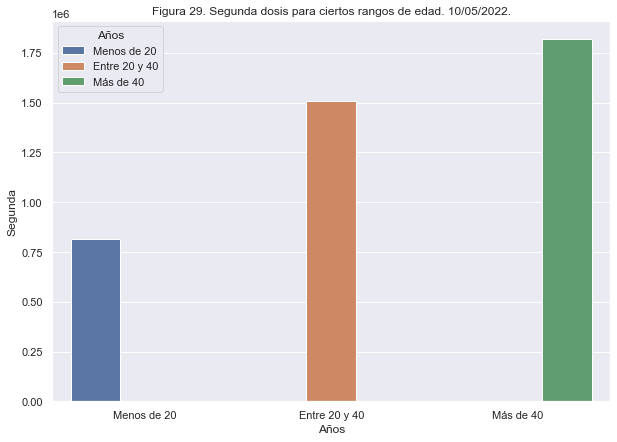

In [378]:
import pandas as pd
import seaborn as sns
grupos_dosis = pd.DataFrame({'Edad': ['5 a 11', '12 a 19', '20 a 39', '40 a 57', '+57'], 
                                'Primera':[376192, 569069, 1630430, 1069960, 791978], 
                                'Segunda':[298096, 516689, 1507239, 1030148, 790845],
                               'Tercera':[0, 219791, 766106, 668003, 645281], 
                               'Cuarta':[0, 21, 197, 4387, 133192]})

grupos_dosis['Total'] = (grupos_dosis['Primera'] + grupos_dosis['Segunda'] + grupos_dosis['Tercera'] + grupos_dosis['Cuarta'])

grupos_dosis.loc[grupos_dosis['Edad'] == '12 a 19', ['Edad']] = ['Menos de 20'] 
grupos_dosis.loc[grupos_dosis['Edad'] == '+57', ['Edad']] = ['Más de 40'] 
grupos_dosis.loc[grupos_dosis['Edad'] == '20 a 39', ['Edad']] = ['Entre 20 y 40'] 

grupos_dosis = grupos_dosis.set_index('Edad')

grupos_dosis.loc['Más de 40'] += grupos_dosis.loc['40 a 57']

grupos_dosis.loc['Menos de 20'] += grupos_dosis.loc['5 a 11']

grupos_dosis.drop(['5 a 11', '40 a 57'], inplace=True)

grupos_dosis['Años'] = grupos_dosis.index.values

sns.barplot(x='Años', y='Segunda', hue='Años', data=grupos_dosis).set(title='Figura 29. Segunda dosis para ciertos rangos de edad. 10/05/2022.')
sns.set(rc={'figure.figsize':(10.0,7.0)})

plt.show()

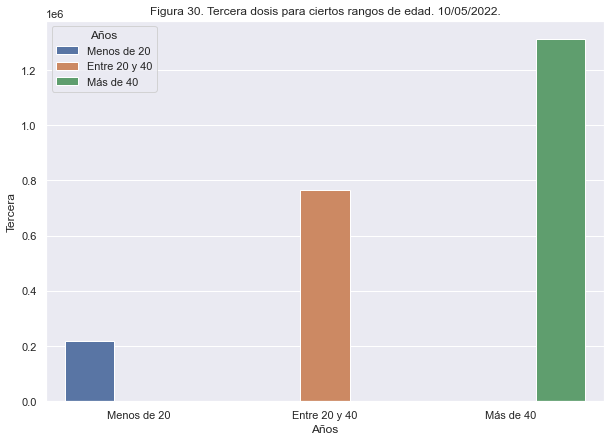

In [379]:
import pandas as pd
import seaborn as sns
grupos_dosis = pd.DataFrame({'Edad': ['5 a 11', '12 a 19', '20 a 39', '40 a 57', '+57'], 
                                'Primera':[376192, 569069, 1630430, 1069960, 791978], 
                                'Segunda':[298096, 516689, 1507239, 1030148, 790845],
                               'Tercera':[0, 219791, 766106, 668003, 645281], 
                               'Cuarta':[0, 21, 197, 4387, 133192]})

grupos_dosis['Total'] = (grupos_dosis['Primera'] + grupos_dosis['Segunda'] + grupos_dosis['Tercera'] + grupos_dosis['Cuarta'])

grupos_dosis.loc[grupos_dosis['Edad'] == '12 a 19', ['Edad']] = ['Menos de 20'] 
grupos_dosis.loc[grupos_dosis['Edad'] == '+57', ['Edad']] = ['Más de 40'] 
grupos_dosis.loc[grupos_dosis['Edad'] == '20 a 39', ['Edad']] = ['Entre 20 y 40'] 

grupos_dosis = grupos_dosis.set_index('Edad')

grupos_dosis.loc['Más de 40'] += grupos_dosis.loc['40 a 57']

grupos_dosis.loc['Menos de 20'] += grupos_dosis.loc['5 a 11']

grupos_dosis.drop(['5 a 11', '40 a 57'], inplace=True)

grupos_dosis['Años'] = grupos_dosis.index.values

sns.barplot(x='Años', y='Tercera', hue='Años', data=grupos_dosis).set(title='Figura 30. Tercera dosis para ciertos rangos de edad. 10/05/2022.')
sns.set(rc={'figure.figsize':(10.0,7.0)})

plt.show()

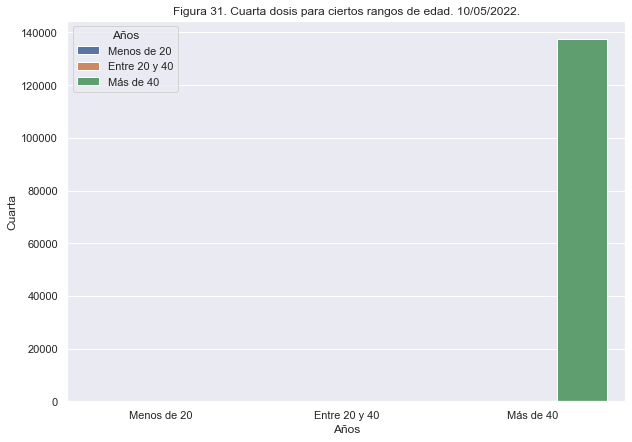

In [380]:
import pandas as pd
import seaborn as sns
grupos_dosis = pd.DataFrame({'Edad': ['5 a 11', '12 a 19', '20 a 39', '40 a 57', '+57'], 
                                'Primera':[376192, 569069, 1630430, 1069960, 791978], 
                                'Segunda':[298096, 516689, 1507239, 1030148, 790845],
                               'Tercera':[0, 219791, 766106, 668003, 645281], 
                               'Cuarta':[0, 21, 197, 4387, 133192]})

grupos_dosis['Total'] = (grupos_dosis['Primera'] + grupos_dosis['Segunda'] + grupos_dosis['Tercera'] + grupos_dosis['Cuarta'])

grupos_dosis.loc[grupos_dosis['Edad'] == '12 a 19', ['Edad']] = ['Menos de 20'] 
grupos_dosis.loc[grupos_dosis['Edad'] == '+57', ['Edad']] = ['Más de 40'] 
grupos_dosis.loc[grupos_dosis['Edad'] == '20 a 39', ['Edad']] = ['Entre 20 y 40'] 

grupos_dosis = grupos_dosis.set_index('Edad')

grupos_dosis.loc['Más de 40'] += grupos_dosis.loc['40 a 57']

grupos_dosis.loc['Menos de 20'] += grupos_dosis.loc['5 a 11']

grupos_dosis.drop(['5 a 11', '40 a 57'], inplace=True)

grupos_dosis['Años'] = grupos_dosis.index.values

sns.barplot(x='Años', y='Cuarta', hue='Años', data=grupos_dosis).set(title='Figura 31. Cuarta dosis para ciertos rangos de edad. 10/05/2022.')
sns.set(rc={'figure.figsize':(10.0,7.0)})

plt.show()

9. ¿Cuál es la distribución porcentual de las vacunas por grupos de edad según la CCSS? ¿Por dosis?

Se observan los distintos grupos de edad y cómo se ven distribuidas el total de dosis aplicadas por distinto grupo, se observa que en la primera, segunda y tercera dosis el más dominante es el grupo de entre 20 a 39 con casi un 35% de vacunación en cada una. El segundo grupo más dominante es de 40 a 57 con un 24 hasta casi 30% en las 3 primeras dosis. En cuanto a la cuarta, se aprecia como más del 95% de la población es mayor a 57 años, tan solo un pequeño porcentaje del segundo grupo mayor es ocupado por estos, y menores de 40 no cuentan casi con dosis aplicadas. 

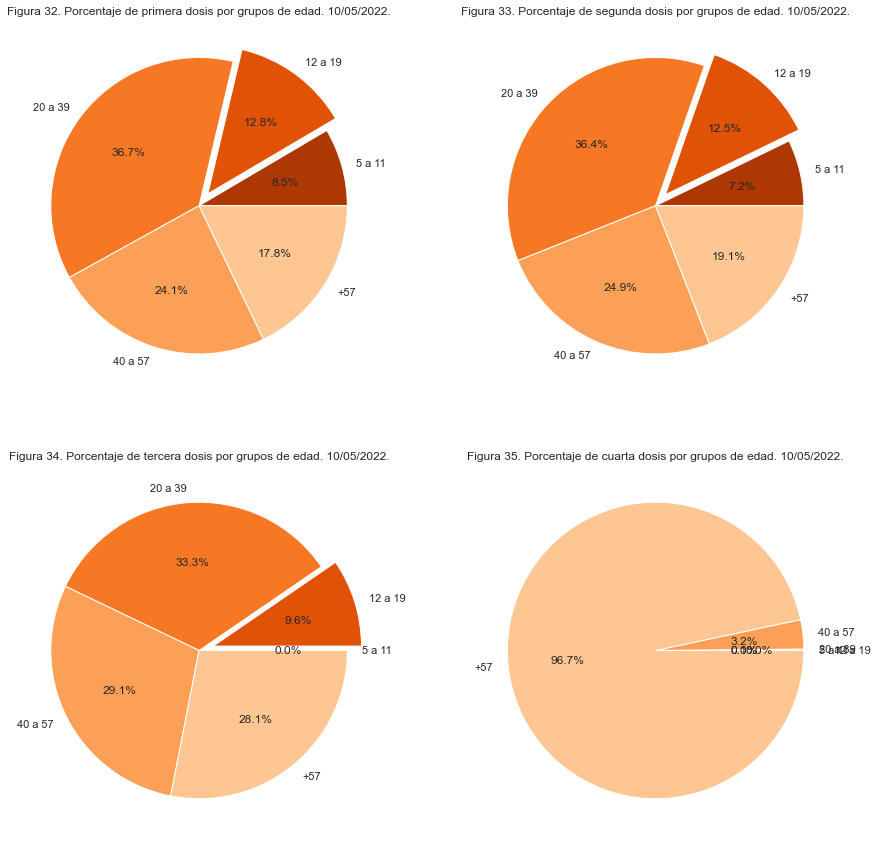

In [381]:
import pandas as pd
import seaborn as sns
grupos_dosis = pd.DataFrame({'Edad': ['5 a 11', '12 a 19', '20 a 39', '40 a 57', '+57'], 
                                'Primera':[376192, 569069, 1630430, 1069960, 791978], 
                                'Segunda':[298096, 516689, 1507239, 1030148, 790845],
                               'Tercera':[0, 219791, 766106, 668003, 645281], 
                               'Cuarta':[0, 21, 197, 4387, 133192]})

grupos_dosis['Total'] = (grupos_dosis['Primera'] + grupos_dosis['Segunda'] + grupos_dosis['Tercera'] + grupos_dosis['Cuarta'])

fig, (axs1, axs2) = plt.subplots(2,2, figsize=(15,15))

resaltar = (0, 0.1, 0, 0, 0)

# listas
primera_dosis = grupos_dosis['Primera']
segunda_dosis = grupos_dosis['Segunda']
tercera_dosis = grupos_dosis['Tercera']
cuarta_dosis = grupos_dosis['Cuarta']
rangos_edades = grupos_dosis['Edad']

# axs1[x] o axs2[x] corresponde a la posición y las operaciones se le realizan a ese gráfico

axs1[0].pie(primera_dosis, explode=resaltar, labels=rangos_edades, colors= escala_magma, autopct='%1.1f%%',
        shadow=False)
axs1[0].set_title('Figura 32. Porcentaje de primera dosis por grupos de edad. 10/05/2022.')

axs1[1].pie(segunda_dosis, explode=resaltar, labels=rangos_edades, colors= escala_magma, autopct='%1.1f%%',
        shadow=False)
axs1[1].set_title('Figura 33. Porcentaje de segunda dosis por grupos de edad. 10/05/2022.')

axs2[0].pie(tercera_dosis, explode=resaltar, labels=rangos_edades, colors= escala_magma, autopct='%1.1f%%',
        shadow=False)
axs2[0].set_title('Figura 34. Porcentaje de tercera dosis por grupos de edad. 10/05/2022.')

axs2[1].pie(cuarta_dosis, explode=resaltar, labels=rangos_edades, colors= escala_magma, autopct='%1.1f%%',
        shadow=False)
axs2[1].set_title('Figura 35. Porcentaje de cuarta dosis por grupos de edad. 10/05/2022.')

plt.show()

10. ¿Cuáles son los porcentajes de avance de la vacunación por dosis con respecto a la población total meta?

En las figuras 36, 37, 38 y 39 se observa como hasta el día 23 de mayo se veía el avance en la vacunación, con un 86% de la población meta vacunada con la primera dosis, 80.2% con la segunda dosis, 44.5% con la tercera dosis, 2.7% con la cuarta dosis y un 14% sin ninguna dosis sin aplicar hasta ese momento.

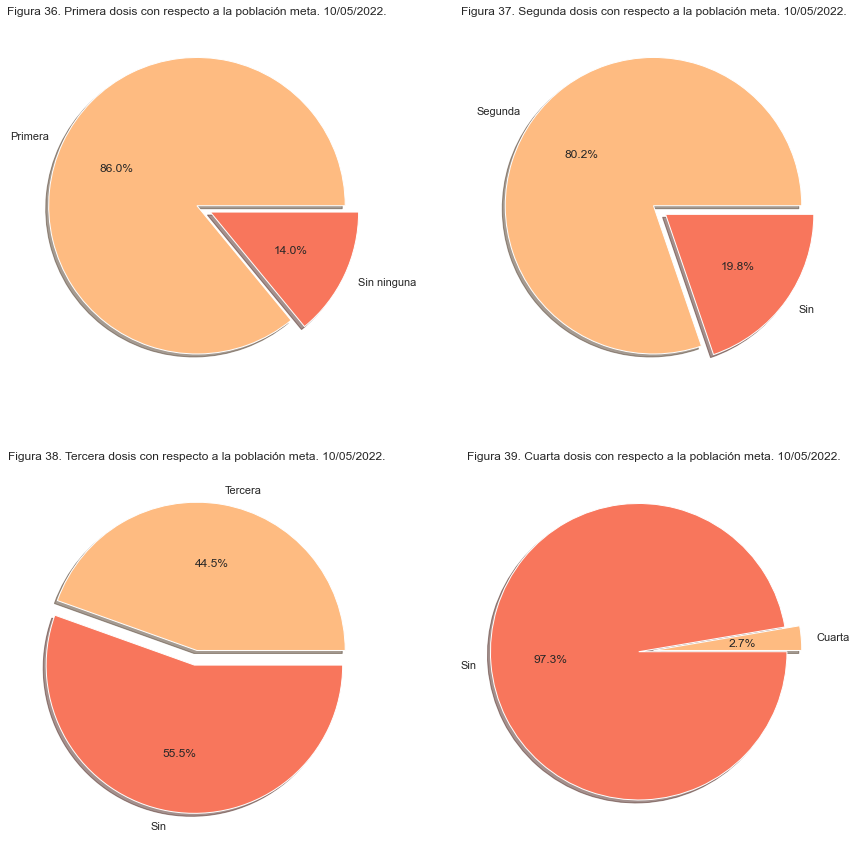

In [384]:
import pandas as pd
import seaborn as sns
dosis_aplicadas = pd.DataFrame({'Dosis': ['Primera', 'Segunda', 'Tercera', 'Cuarta'], 
                                'Personas vacunadas':[4437629, 4143017, 2299181, 137797], 
                                'Poblacion meta':[5163021, 5163021, 5163021, 5163021]})

dosis_aplicadas['Personas sin dosis'] = (dosis_aplicadas['Poblacion meta'] - dosis_aplicadas['Personas vacunadas'])

dosis_aplicadas

poblacion_vacunada = dosis_aplicadas['Personas vacunadas']
poblacion_restante = dosis_aplicadas['Personas sin dosis']

resaltar = (0, 0.1)
escala = sns.color_palette("magma_r")

fig, (eje1, eje2) = plt.subplots(2,2, figsize=(15,15))

# posiciones con nombre
graf_primera_dosis = eje1[0]
graf_segunda_dosis = eje1[1]
graf_tercera_dosis = eje2[0]
graf_cuarta_dosis = eje2[1]

graf_primera_dosis.pie([poblacion_vacunada[0], poblacion_restante[0]], explode=resaltar, labels=('Primera', 'Sin ninguna'), 
            colors= escala, autopct='%1.1f%%', shadow=True)
graf_primera_dosis.set_title('Figura 36. Primera dosis con respecto a la población meta. 10/05/2022.')

graf_segunda_dosis.pie([poblacion_vacunada[1], poblacion_restante[1]], explode=resaltar, labels=('Segunda', 'Sin'), 
            colors= escala, autopct='%1.1f%%', shadow=True)
graf_segunda_dosis.set_title('Figura 37. Segunda dosis con respecto a la población meta. 10/05/2022.')

graf_tercera_dosis.pie([poblacion_vacunada[2], poblacion_restante[2]], explode=resaltar, labels=('Tercera', 'Sin'), 
            colors= escala, autopct='%1.1f%%', shadow=True)
graf_tercera_dosis.set_title('Figura 38. Tercera dosis con respecto a la población meta. 10/05/2022.')

graf_cuarta_dosis.pie([poblacion_vacunada[3], poblacion_restante[3]], explode=resaltar, labels=('Cuarta', 'Sin'), 
            colors= escala, autopct='%1.1f%%', shadow=True)
graf_cuarta_dosis.set_title('Figura 39. Cuarta dosis con respecto a la población meta. 10/05/2022.')

plt.show()

Conclusión:

Observando las gráficas se aprecia que el grupo de edad con el que más dosis cuenta son los mayores, en especial el de más de 57 años, seguido del grupo de 40 años. Además, los establecimientos de salud con una menor cantidad de dosis aplicadas son por lo general rurales o menos poblados, como es el caso de Colorado, Paquera, Hojancha, entre otros, mientras que las más vacunadas son centros donde cerca se encuentra una gran cantidad de población como Turrialba-Jimenez, Paraíso, Curridabat, y de más. Lo mismo ocurre con los hospitales, al que más dosis se aplican es al Hospital Mexico (ubicado en San José), y al que menos a un psiquiatrico al cual no puede entrar o salir mucha gente porque su salida es controlada.

Las regiones no son la excepción, siendo las principales las del centro del país como Central Sur y Central Norte, mientras que las otras le siguen. Se ve que la mayoría de la población cuenta con la primera y segunda dosis, casi la mitad de la población meta con la tercera mientras que muy poca tiene la cuarta, tal vez debido al poco tiempo que se lleva aplicando.